In [158]:
import cv2
from matplotlib import pyplot as plt

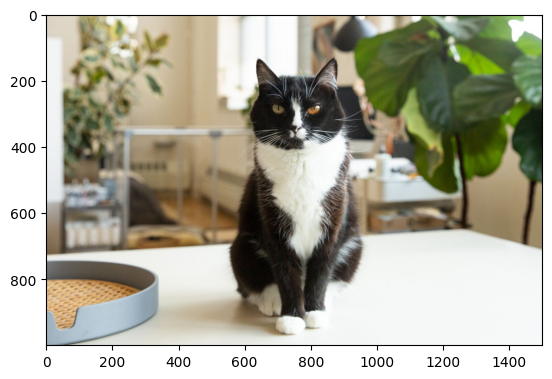

In [207]:
import cv2

img = cv2.imread("Resources/semigoodbg.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convert from BGR to RGB

plt.imshow(img)

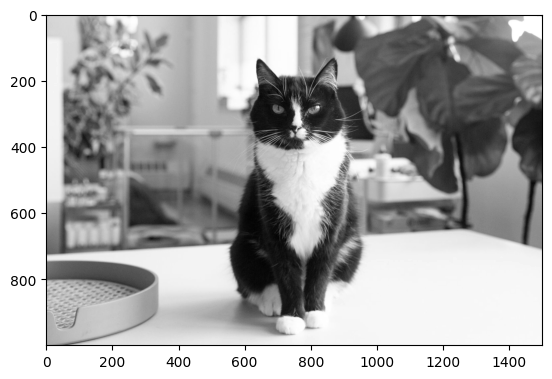

In [208]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='gray')

153.873406
72.18254696687997
161.0


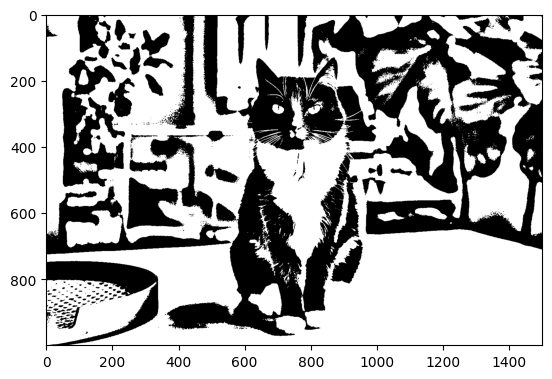

In [209]:
import numpy as np

# _ , thresh = cv2.threshold(gray, np.mean(gray), 255, cv2.THRESH_BINARY_INV)
thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 255, 5)
# _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
# _ , thresh = cv2.threshold(gray, np.median(gray), 255, cv2.THRESH_BINARY_INV)

# _ , thresh = cv2.threshold(gray, 77, 255, cv2.THRESH_BINARY_INV)

# mean_value = np.mean(gray)
# std_value = np.std(gray)

# k = 0.8

# threshold_value = mean_value + k * std_value

# _ , thresh = cv2.threshold(gray, threshold_value, 255, cv2.THRESH_BINARY)



plt.imshow(thresh, cmap='gray')
print(np.mean(gray))
print(np.std(gray))
print(np.median(gray))

In [210]:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

print("Number of contours found = {}".format(len(contours)))

Number of contours found = 1857


In [211]:
cnt = sorted(contours, key=cv2.contourArea)[-1]
img.shape[:2]

(1000, 1500)

In [212]:
mask = np.zeros(img.shape[:2], np.uint8)

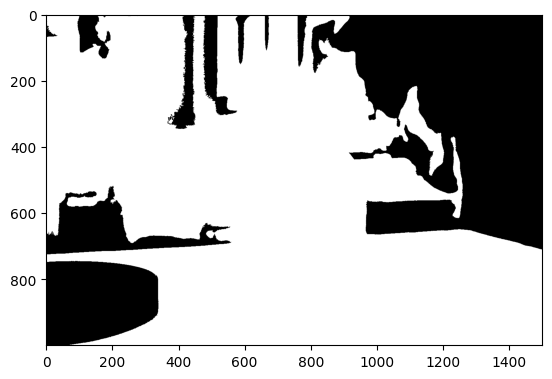

In [213]:
maskedFinal = cv2.drawContours(mask, [cnt], -1, (255, 255, 255), -1)
plt.imshow(maskedFinal, cmap='gray')

[[[  0   0   0]
  [215 206 191]
  [217 208 193]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [215 206 191]
  [217 208 193]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [215 206 191]
  [217 208 193]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [247 248 250]
  [247 248 250]
  [247 248 250]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [247 248 250]
  [247 248 250]
  [247 248 250]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [247 248 250]
  [247 248 250]
  [247 248 250]]]


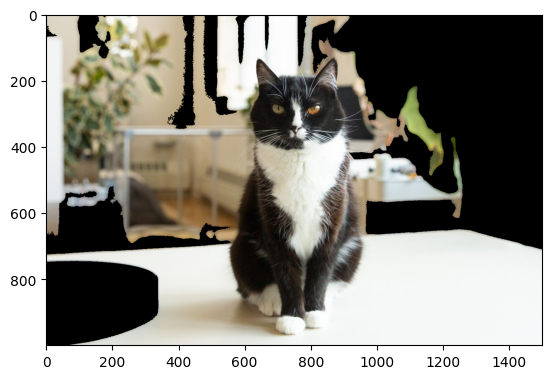

In [214]:
finalImage = cv2.bitwise_and(img, img, mask=maskedFinal)
plt.imshow(finalImage)
print(finalImage)

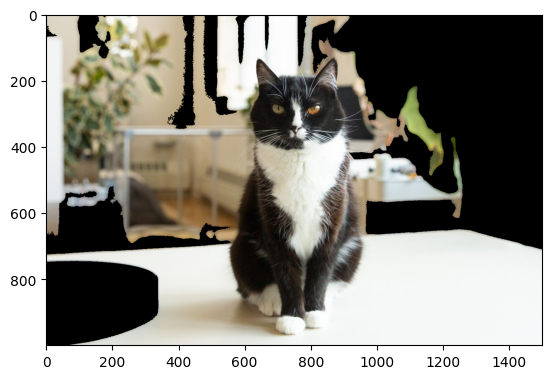

In [215]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'img' is your original image
# Assuming 'maskedFinal' is the mask obtained after background removal

# Create a mask where the desired object is in white (255) and the background is in black (0)
object_mask = np.zeros_like(maskedFinal)
object_mask[maskedFinal > 0] = 255

# Use the mask to extract the desired object and remove the background
finalImage = cv2.bitwise_and(img, img, mask=object_mask)

# Display the result
plt.imshow(finalImage)
plt.show()


In [216]:
from sklearn.cluster import KMeans

In [217]:
clt = KMeans(n_clusters=3)
clt.fit(finalImage.reshape(-1, 3))

c:\Users\RoG\anaconda3\envs\licenta\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [218]:
clt.labels_
clt.cluster_centers_

array([[234.36453739, 234.94876099, 229.81980994],
       [ 10.31629707,   9.06450436,   7.25611259],
       [155.41744092, 143.80615746, 115.61290357]])

In [219]:
def palette(clusters):
    width = 300
    alette = np.zeros((50, width, 3), np.uint8)
    steps = width/clusters.cluster_centers_.shape[0]
    for idx, centers in enumerate(clusters.cluster_centers_): 
        palette[:, int(idx*steps):(int((idx+1)*steps)), :] = centers
    return palette

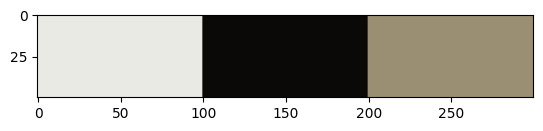

In [220]:
def palette(clusters):
    width = 300
    palette = np.zeros((50, width, 3), np.uint8)
    steps = width/clusters.cluster_centers_.shape[0]
    for idx, centers in enumerate(clusters.cluster_centers_): 
        palette[:, int(idx*steps):(int((idx+1)*steps)), :] = centers
    return palette

plt.imshow(palette(clt))


In [221]:
finalImageRGB = cv2.cvtColor(finalImage, cv2.COLOR_BGR2RGB)

blackMask = np.all(finalImageRGB == [0, 0, 0], axis=-1)

pixels = finalImage[~blackMask].reshape(-1, 3)

In [222]:
num_clusters = 3

clt = KMeans(n_clusters=num_clusters)
clt.fit(pixels)

c:\Users\RoG\anaconda3\envs\licenta\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

array([[236, 237, 233],
       [ 59,  53,  40],
       [169, 157, 129]])

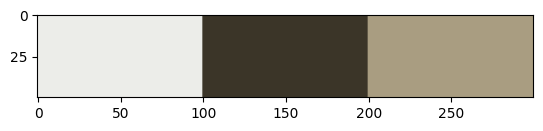

In [223]:
plt.imshow(palette(clt))
dominant_colors = clt.cluster_centers_.astype(int)
dominant_colors

c:\Users\RoG\anaconda3\envs\licenta\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Dominant Colors: [[ 42  55  61]
 [233 238 236]
 [130 158 169]]


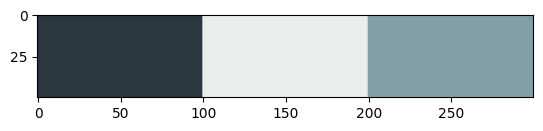

In [224]:
import cv2
import numpy as np
from sklearn.cluster import KMeans

def filter_background(pixels, threshold=10):
    # Filter out pixels that are close to black (adjust threshold as needed)
    filtered_pixels = pixels[np.any(pixels > threshold, axis=1)]
    return filtered_pixels

# Convert the image to the RGB color space
finalImage = cv2.cvtColor(finalImage, cv2.COLOR_BGR2RGB)

# Flatten the image array
pixels = finalImage.reshape(-1, 3)

# Filter out background pixels
filtered_pixels = filter_background(pixels)

# Number of clusters (adjust as needed)
num_clusters = 3

# Apply KMeans clustering
clt = KMeans(n_clusters=num_clusters)
clt.fit(filtered_pixels)

# Get the dominant colors
dominant_colors = clt.cluster_centers_.astype(int)

# Display or use the dominant colors
print("Dominant Colors:", dominant_colors)
plt.imshow(palette(clt))


c:\Users\RoG\anaconda3\envs\licenta\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Dominant Colors: [[184 173 145]
 [211 208 195]
 [ 83  74  55]
 [139 127  97]
 [243 244 242]]


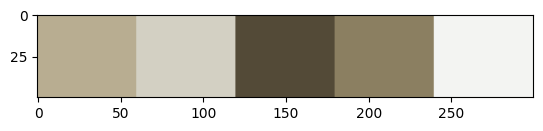

In [225]:
import cv2
import numpy as np
from sklearn.cluster import KMeans

def filter_background(pixels, threshold=50):
    # Filter out pixels with intensity below the threshold
    filtered_pixels = pixels[pixels[:, 0] > threshold]
    return filtered_pixels

# Convert the image to the RGB color space
finalImage = cv2.cvtColor(finalImage, cv2.COLOR_BGR2RGB)

# Flatten the image array
pixels = finalImage.reshape(-1, 3)

# Set a threshold for pixel intensity (adjust as needed)
intensity_threshold = 50

# Filter out background pixels
filtered_pixels = filter_background(pixels, intensity_threshold)

# Number of clusters (adjust as needed)
num_clusters = 5

# Apply KMeans clustering
clt = KMeans(n_clusters=num_clusters)
clt.fit(filtered_pixels)

# Get the dominant colors
dominant_colors = clt.cluster_centers_.astype(int)

# Display or use the dominant colors
print("Dominant Colors:", dominant_colors)
plt.imshow(palette(clt))


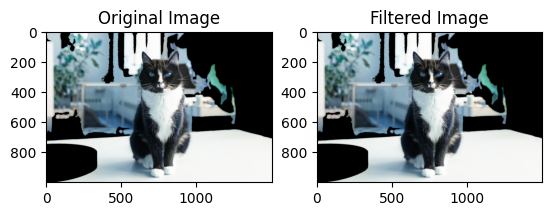

c:\Users\RoG\anaconda3\envs\licenta\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Dominant Colors: [[  7   8  10]
 [229 234 234]
 [115 143 155]]


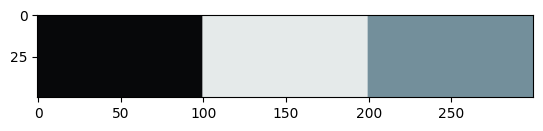

In [226]:
import cv2
import numpy as np
from sklearn.cluster import KMeans

def filter_background(image, intensity_threshold=30, saturation_threshold=30):
    # Convert the image to the HSV color space
    hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Threshold based on intensity and saturation
    background_mask = (hsv_image[:, :, 2] < intensity_threshold) & (hsv_image[:, :, 1] < saturation_threshold)

    # Invert the mask to keep non-background pixels
    foreground_mask = ~background_mask

    # Apply the mask to the original image
    filtered_image = image.copy()
    filtered_image[background_mask] = [0, 0, 0]  # Set background pixels to black

    return filtered_image, foreground_mask

# Convert the image to the RGB color space
finalImage = cv2.cvtColor(finalImage, cv2.COLOR_BGR2RGB)

# Filter out background pixels
filtered_image, foreground_mask = filter_background(finalImage)

# Display the original and filtered images
plt.subplot(1, 2, 1), plt.imshow(finalImage), plt.title('Original Image')
plt.subplot(1, 2, 2), plt.imshow(filtered_image), plt.title('Filtered Image')
plt.show()

# Flatten the filtered image array
filtered_pixels = filtered_image.reshape(-1, 3)

# Number of clusters (adjust as needed)
num_clusters = 3

# Apply KMeans clustering
clt = KMeans(n_clusters=num_clusters)
clt.fit(filtered_pixels)

# Get the dominant colors
dominant_colors = clt.cluster_centers_.astype(int)

# Display or use the dominant colors
print("Dominant Colors:", dominant_colors)
plt.imshow(palette(clt))


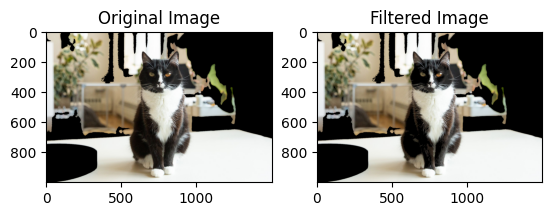

c:\Users\RoG\anaconda3\envs\licenta\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Dominant Colors: [[  8   7   6]
 [234 234 229]
 [154 143 114]]


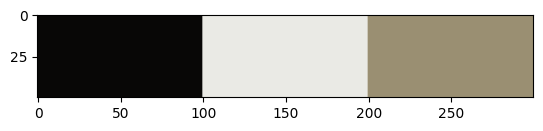

In [227]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def filter_background(image, intensity_threshold=30):
    # Create a mask for pixels below the intensity threshold
    background_mask = np.all(image < intensity_threshold, axis=-1)

    # Invert the mask to keep non-background pixels
    foreground_mask = ~background_mask

    # Apply the mask to the original image
    filtered_image = image.copy()
    filtered_image[background_mask] = [0, 0, 0]  # Set background pixels to black

    return filtered_image, foreground_mask

finalImage = cv2.cvtColor(finalImage, cv2.COLOR_BGR2RGB)

# Filter out background pixels
filtered_image, foreground_mask = filter_background(finalImage)

# Display the original and filtered images
plt.subplot(1, 2, 1), plt.imshow(finalImage), plt.title('Original Image')
plt.subplot(1, 2, 2), plt.imshow(filtered_image), plt.title('Filtered Image')
plt.show()

# Flatten the filtered image array
filtered_pixels = filtered_image.reshape(-1, 3)

# Number of clusters (adjust as needed)
num_clusters = 3

# Apply KMeans clustering
clt = KMeans(n_clusters=num_clusters)
clt.fit(filtered_pixels)

# Get the dominant colors
dominant_colors = clt.cluster_centers_.astype(int)

# Display or use the dominant colors
print("Dominant Colors:", dominant_colors)
plt.imshow(palette(clt))


c:\Users\RoG\anaconda3\envs\licenta\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Dominant Colors: [[115 143 155]
 [  6   7   8]
 [230 235 234]]
Proportions: [25.285866666666667, 42.13906666666667, 32.57506666666667]


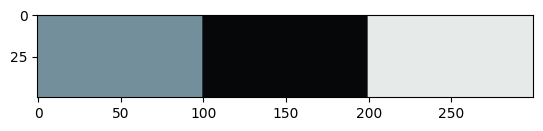

In [228]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def filter_background(image, intensity_threshold=30):
    # Create a mask for pixels below the intensity threshold
    background_mask = np.all(image < intensity_threshold, axis=-1)

    # Invert the mask to keep non-background pixels
    foreground_mask = ~background_mask

    # Apply the mask to the original image
    filtered_image = image.copy()
    filtered_image[background_mask] = [0, 0, 0]  # Set background pixels to black

    return filtered_image, foreground_mask

# Assuming 'finalImage' is the result after background removal
finalImage = cv2.cvtColor(finalImage, cv2.COLOR_BGR2RGB)

# Filter out background pixels
filtered_image, foreground_mask = filter_background(finalImage)

# Flatten the filtered image array
filtered_pixels = filtered_image.reshape(-1, 3)

# Number of clusters (adjust as needed)
num_clusters = 3

# Apply KMeans clustering
clt = KMeans(n_clusters=num_clusters)
clt.fit(filtered_pixels)

# Get the dominant colors
dominant_colors = clt.cluster_centers_.astype(int)

# Calculate the proportion of each color
total_pixels = len(filtered_pixels)
proportions = [(np.sum(clt.labels_ == i) / total_pixels) * 100 for i in range(num_clusters)]

# Display or use the dominant colors and proportions
print("Dominant Colors:", dominant_colors)
print("Proportions:", proportions)

# Optionally, display the color palette
plt.imshow(palette(clt))
plt.show()


c:\Users\RoG\anaconda3\envs\licenta\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Dominant Colors: [[ 58  52  41]
 [242 244 241]
 [176 164 135]
 [126 115  86]
 [206 202 186]]
Proportions: [11.796151878323695, 38.35687374998062, 18.301369013473074, 15.698227879502008, 15.8473774787206]


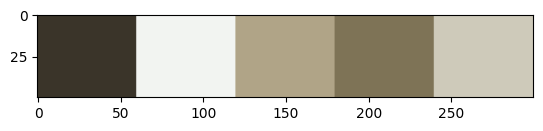

In [229]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def filter_background(image, intensity_threshold=30):
    # Create a mask for pixels below the intensity threshold
    background_mask = np.all(image < intensity_threshold, axis=-1)

    # Invert the mask to keep non-background pixels
    foreground_mask = ~background_mask

    # Apply the mask to the original image
    filtered_image = image.copy()
    filtered_image[background_mask] = [0, 0, 0]  # Set background pixels to black

    return filtered_image, foreground_mask

# Assuming 'finalImage' is the result after background removal
finalImage = cv2.cvtColor(finalImage, cv2.COLOR_BGR2RGB)

# Filter out background pixels
filtered_image, foreground_mask = filter_background(finalImage)

# Flatten the filtered image array
filtered_pixels = filtered_image.reshape(-1, 3)

# Number of clusters (adjust as needed)
num_clusters = 5

# Apply KMeans clustering
clt = KMeans(n_clusters=num_clusters)
clt.fit(filtered_pixels[foreground_mask.reshape(-1)])

# Get the dominant colors
dominant_colors = clt.cluster_centers_.astype(int)

# Calculate the proportion of each color
total_foreground_pixels = np.sum(foreground_mask)
proportions = [(np.sum(clt.labels_ == i) / total_foreground_pixels) * 100 for i in range(num_clusters)]

# Display or use the dominant colors and proportions
print("Dominant Colors:", dominant_colors)
print("Proportions:", proportions)

# Optionally, display the color palette
plt.imshow(palette(clt))
plt.show()


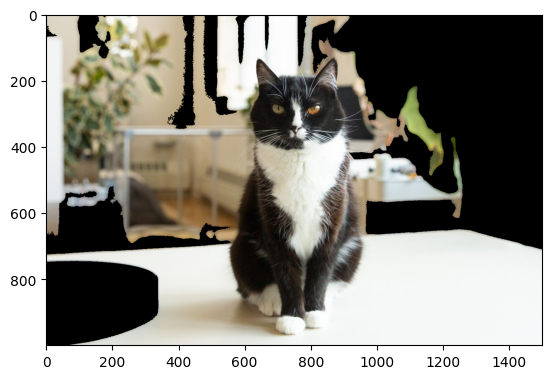

In [230]:
plt.imshow(finalImage)